<a href="https://colab.research.google.com/github/bunnyband/Data-Science/blob/main/Belt_Exam_2_Drug_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Import Necessary Libraries

In [ ]:
# Import Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Data Manipulation Libraries

import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn import metrics
set_config(display='diagram')

# Import Classification Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import Score and Confusion Matrix Libraries

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix

##### Exploring the Data Set

In [ ]:
# Display Data Set
filename = ('/content/drive/MyDrive/datasets/Belt2_A_drugtype_v2_final.csv')
df = pd.read_csv(filename)
df

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ
...,...,...,...,...,...,...
291,44.0,F,High,HIGH,12.854,drugQ
292,NaN,F,Normal,HIGH,10.065,drugZ
293,49.0,M,Low,NORMAL,11.014,drugZ
294,29.0,F,High,NORMAL,9.475,drugQ


In [ ]:
# Check data contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


In [ ]:
# Check Missing Data
df.isnull().sum()

Age            59
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

###### Explore and Clean 'Age' Data Set

In [ ]:
# Check for Inconsistent data
df['Age'].value_counts().head()

36.0    9
43.0    7
55.0    7
61.0    7
42.0    7
Name: Age, dtype: int64

In [ ]:
df['Age'].min()

15.0

In [ ]:
df['Age'].max()

570.0

In [ ]:
# Fix Inconsistent Data
df['Age'] = df['Age'].replace({570:57})

In [ ]:
df['Age'].max()

74.0

###### Explore and Clean 'Gender' Data Set

In [ ]:
# Check for Inconsistent Data
df['Gender'].value_counts()

M         149
F         137
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64

In [ ]:
# Fix Inconsistent Data
df['Gender'] = df['Gender'].replace({'male':'M', 
                                     'female':'F', 
                                     'Female':'F', 
                                     'Male':'M', 
                                     'femal':'F', 
                                     'Femal':'F'})

In [ ]:
df['Gender'].value_counts()

M    154
F    142
Name: Gender, dtype: int64

In [ ]:
# Change Categorical Values to Numeric
df['Gender'] = df['Gender'].replace({'M':0, 'F':1})

In [ ]:
df['Gender'].value_counts()

0    154
1    142
Name: Gender, dtype: int64

###### Explore and Clean 'BP' Data Set

In [ ]:
# Check for Inconsistent Data
df['BP'].value_counts()

High      142
Normal     46
Low        33
Name: BP, dtype: int64

In [ ]:
# Change Categorical Values to Numeric
df['BP'] = df['BP'].replace({'High':2, 'Normal':1, 'Low':0})

df['BP'] = df['BP'].astype('Int64') # Change values to integers

df['BP'].value_counts()


2    142
1     46
0     33
Name: BP, dtype: Int64

###### Explore and Clean 'Cholesterol' Data Set

In [ ]:
# Check for Inconsistent Data
df['Cholesterol'].value_counts()

HIGH      156
NORMAL    117
norm        9
high        8
NORM        6
Name: Cholesterol, dtype: int64

In [ ]:
# Fix Inconsistent Data
df['Cholesterol'] = df['Cholesterol'].replace({'norm':'NORMAL', 
                                     'high':'HIGH', 
                                     'NORM':'NORMAL'})

df['Cholesterol'].value_counts()

HIGH      164
NORMAL    132
Name: Cholesterol, dtype: int64

In [ ]:
# Change Categorical Values to Numeric
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':1, 'NORMAL':0})

df['Cholesterol'] = df['Cholesterol'].astype('Int64') # Change values to integers

df['Cholesterol'].value_counts()


1    164
0    132
Name: Cholesterol, dtype: Int64

In [ ]:
# Display new data values
df['Cholesterol'].value_counts()

1    164
0    132
Name: Cholesterol, dtype: Int64

###### Explore and Clean 'Na_to_K' Data Set

In [ ]:
# Check for Inconsistent Data
df['Na_to_K'].value_counts()

12.307    7
13.967    7
13.091    7
12.766    7
11.198    7
         ..
10.091    1
16.275    1
8.107     1
10.443    1
12.879    1
Name: Na_to_K, Length: 183, dtype: int64

In [ ]:
# Fix Inconsistent Data
df['Na_to_K'] = df['Na_to_K'].replace({'10.403_':'10.403'})

In [ ]:
# Display Fixed Data
df['Na_to_K'].value_counts()

12.307    7
13.967    7
13.091    7
12.766    7
11.198    7
         ..
10.091    1
16.275    1
8.107     1
10.443    1
12.879    1
Name: Na_to_K, Length: 183, dtype: int64

In [ ]:
# Change data type to float
df['Na_to_K'] = pd.to_numeric(df['Na_to_K'], downcast = 'float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    int64  
 2   BP           221 non-null    Int64  
 3   Cholesterol  296 non-null    Int64  
 4   Na_to_K      296 non-null    float32
 5   Drug         296 non-null    object 
dtypes: Int64(2), float32(1), float64(1), int64(1), object(1)
memory usage: 13.4+ KB


###### Explore and Clean 'Drug' Data Set

In [ ]:
# Check for Inconsistent data
df['Drug'].value_counts()

drugQ    148
drugZ    148
Name: Drug, dtype: int64

In [ ]:
# Convert Target to Numeric Values
df['Drug'] = df['Drug'].replace({'drugQ':0, 'drugZ':1})

In [ ]:
# Search for Duplicate Data

df.duplicated().sum()

15

In [ ]:
# Drop Duplicate Data

df_new = df.drop_duplicates()

df_new

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,0,2,1,13.935,0
1,40.0,1,1,1,10.103,1
2,NaN,0,1,1,9.084,1
3,62.0,0,1,1,16.594,1
4,55.0,1,2,0,10.977,0
...,...,...,...,...,...,...
290,51.0,0,2,1,18.295,1
292,NaN,1,1,1,10.065,1
293,49.0,0,0,0,11.014,1
294,29.0,1,2,0,9.475,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    int64  
 2   BP           206 non-null    Int64  
 3   Cholesterol  281 non-null    Int64  
 4   Na_to_K      281 non-null    float32
 5   Drug         281 non-null    int64  
dtypes: Int64(2), float32(1), float64(1), int64(2)
memory usage: 14.8 KB


In [ ]:
# Check Missing Data
df_new.isnull().sum()

Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

##### Data Visualizations

###### 01 - Gender Distribution

This visualization tells us that there is an almost equal distribution of male and female patients in the drug study

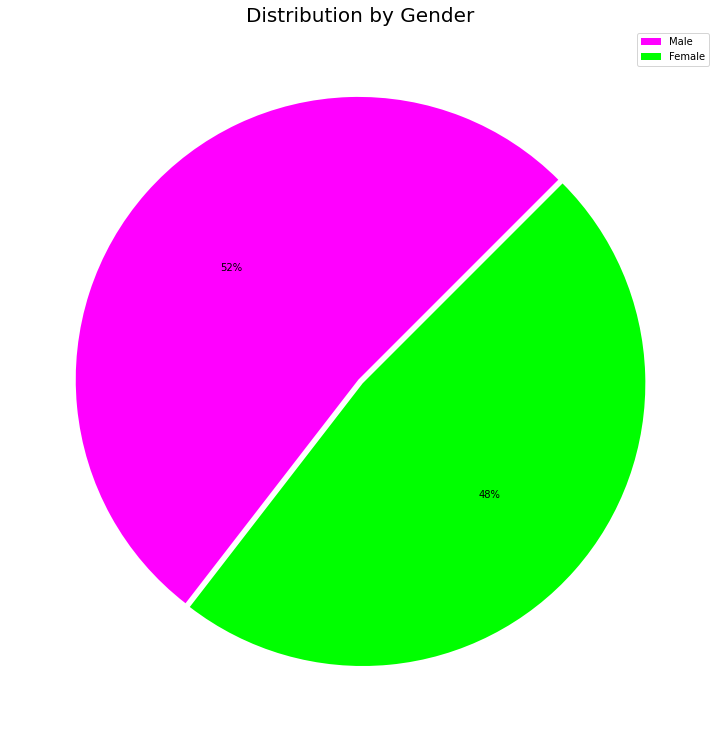

In [ ]:
explode1 = (0.01, 0.01)
x1 = df['Gender'].value_counts()
mycolors1 = ["fuchsia", "lime"]

labels = ['Male', 'Female']
x1.plot.pie(figsize = (25, 13), autopct='%.0f%%', explode = explode1, startangle = 45, colors = mycolors1, labels = None);
plt.title('Distribution by Gender', fontsize = 20);
plt.ylabel('', fontsize = 30);
plt.legend(labels, loc="best")

###### 02 - Drug Distribution

This visualization tells us that those patients with higher sodium to potassium ratio in their blood are mostly being prescribed with drugZ

[Text(0, 0, 'drugQ'), Text(0, 0, 'drugZ')]

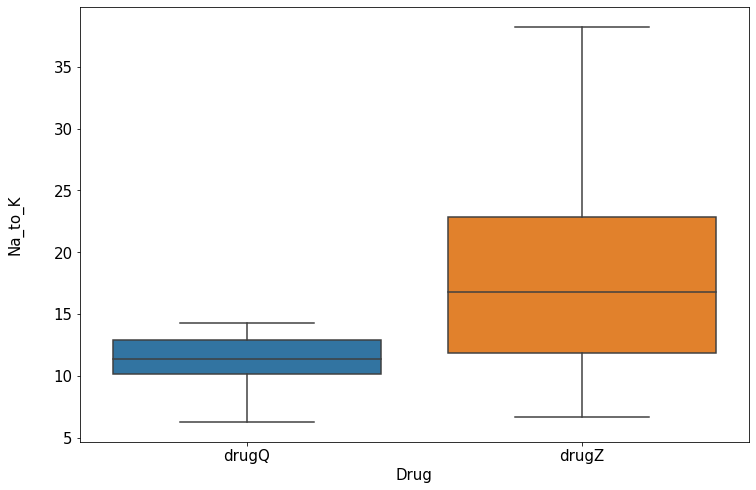

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,8));
sns.boxplot(x = 'Drug', y = 'Na_to_K', data = df_new);

plt.xticks(fontsize = 15, rotation = 90);
plt.yticks(fontsize = 15);
plt.xlabel('Drug', fontsize = 15);
plt.ylabel('Na_to_K', fontsize = 15, labelpad = 30);

x1 = [0,1]
druglabel = ['drugQ','drugZ']

axes.set_xticks(x1)
axes.set_xticklabels(druglabel, minor=False, rotation = 0)

##### Classification via KNN - Default Hyperparameter

In [ ]:
# Split Data Set
X_knn = df_new.drop(columns = 'Drug')
y_knn = df_new['Drug']
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, random_state=42)

###### Pre-processing via pipelines

Imputation using the median strategy would be appropriate for the Age and Blood Pressure columns so that it will return an integer value. 

---

Numerical values will be scaled for easier modelling. 

---

Categorical values were already changed to numerical values during the data cleaning part. This is to ensure that all values are mostly numerical for easier modelling. 

In [ ]:
# Imputers
# This will be used to fill in the missing data in 'Age' column and 'Blood Pressure' column
freq_imputer = SimpleImputer(strategy='median')

# Scaler
scaler = StandardScaler()

# Selectors copy
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Numeric pipeline
numeric_pipe = make_pipeline(freq_imputer, scaler)

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)

# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6637ed90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6637e7d0>)])

In [ ]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6637ed90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6637e7d0>)])

In [ ]:
# Fit Data on Training Set

preprocessor.fit(X_train_knn)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6637ed90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6637e7d0>)])

In [ ]:
# transform train and test (X)
X_train_knn = preprocessor.transform(X_train_knn)
X_test_knn = preprocessor.transform(X_test_knn)

In [ ]:
# Check for Missind Data
print(np.isnan(X_train_knn).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_knn).sum().sum(), 'missing values in testing data')

0 missing values in training data
0 missing values in testing data


###### KNN Classification Proper

In [ ]:
#Create a pipeline with a StandardScaler and KNN Classifier
knn = KNeighborsClassifier()
knn_pipeline = make_pipeline(scaler, knn)

# Fit to KNN Pipelines
knn_pipeline.fit(X_train_knn, y_train_knn)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Obtain Predictions

test_preds_knn = knn_pipeline.predict(X_test_knn)

# Calculate Accuracy Score
accuracy_knn = accuracy_score(y_test_knn, test_preds_knn)
accuracy_knn = round(accuracy_knn, 4)

print('The KNN Accuracy Score is', accuracy_knn)

The KNN Accuracy Score is 0.9155


In [ ]:
# Calculate Recall Score

recall_knn = metrics.recall_score(y_test_knn, test_preds_knn)
recall_knn = round(recall_knn, 4)

print('The KNN Recall Score is', recall_knn)

The KNN Recall Score is 0.8571


In [ ]:
# calculate Classification Accuracy - Default
score_knn = knn_pipeline.score(X_test_knn, y_test_knn);
score_knn = round(score_knn, 4);

print('The Default KNN Classification Accuracy is', score_knn);

The Default KNN Classification Accuracy is 0.9155


###### Confusion Matrix for KNN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


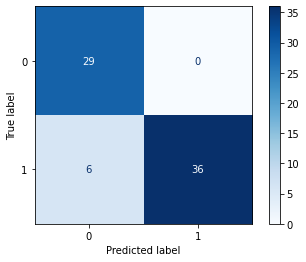

In [ ]:
# Confusion Matrix for KNN

plot_confusion_matrix(knn_pipeline, X_test_knn, y_test_knn, cmap = 'Blues');

###### Metrics

In [ ]:
# KNN 

cm_knn = metrics.confusion_matrix(y_test_knn.values, test_preds_knn)
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()

print('Tn is ',tn_knn, '= True Negative for KNN Model')
print('\n')
print('Fp is ',fp_knn, '= False Positive for KNN Model')
print('\n')
print('Fn is ',fn_knn, '= False Negative for KNN Model')
print('\n')
print('Tp is ',tp_knn, '= True Positive for KNN Model')

Tn is  29 = True Negative for KNN Model


Fp is  0 = False Positive for KNN Model


Fn is  6 = False Negative for KNN Model


Tp is  36 = True Positive for KNN Model


###### Sensitivity vs Specificity

In [ ]:
# Sensitivity
sensitivity_knn = tp_knn / (tp_knn + fn_knn)
sensitivity_knn = round(sensitivity_knn, 4);

#Specificity
specificity_knn = tn_knn / (tn_knn + fp_knn)
specificity_knn = round(specificity_knn, 4);

print('Sensitivity is ',sensitivity_knn, 'for KNN Model')
print('\n')
print('Specificity is ',specificity_knn, 'for KNN Model')

Sensitivity is  0.8571 for KNN Model


Specificity is  1.0 for KNN Model


##### Classification via Random Forest - Default Hyperparameter

In [ ]:
# Split Data Set
X_rf = df_new.drop(columns = 'Drug')
y_rf = df_new['Drug']

# Train test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, random_state = 42)

###### Random Forest Classification Proper

In [ ]:
#Create a pipeline with a StandardScaler and KNN Classifier
rf = RandomForestClassifier(random_state = 42)
rf_pipeline = make_pipeline(scaler, rf)

# Fit Data on Training Set
preprocessor.fit(X_train_rf)

# transform train and test (X)
X_train_rf = preprocessor.transform(X_train_rf)
X_test_rf = preprocessor.transform(X_test_rf)

# Check for Missind Data
print(np.isnan(X_train_rf).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_rf).sum().sum(), 'missing values in testing data')


0 missing values in training data
0 missing values in testing data


In [ ]:
# Fit to Random Forest Pipelines
rf_pipeline.fit(X_train_rf, y_train_rf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
# Obtain Predictions

test_preds_rf = rf_pipeline.predict(X_test_rf)

# Calculate Accuracy Score
accuracy_rf = accuracy_score(y_test_rf, test_preds_rf)
accuracy_rf = round(accuracy_rf, 4)

print('The Random Foreset Accuracy Score is', accuracy_rf)

The Random Foreset Accuracy Score is 0.9577


In [ ]:
# Calculate Recall Score

recall_rf = metrics.recall_score(y_test_rf, test_preds_rf)
recall_rf = round(recall_rf, 4)

print('The Random Forest Recall Score is', recall_rf)

The Random Forest Recall Score is 0.9286


###### Confusion Matrix for Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


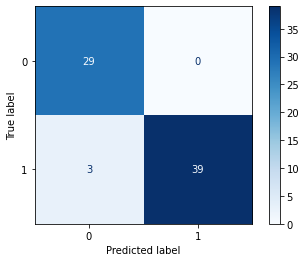

In [ ]:
# Confusion Matrix for Random Forest

plot_confusion_matrix(rf_pipeline, X_test_rf, y_test_rf, cmap = 'Blues');

###### Metrics

In [ ]:
# Random Forest Metrics

cm_rf = metrics.confusion_matrix(y_test_rf.values, test_preds_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

print('Tn is ',tn_rf, '= True Negative for Random Forest Model')
print('\n')
print('Fp is ',fp_rf, '= False Positive for Random Forest Model')
print('\n')
print('Fn is ',fn_rf, '= False Negative for Random Forest Model')
print('\n')
print('Tp is ',tp_rf, '= True Positive for Random Forest Model')

Tn is  29 = True Negative for Random Forest Model


Fp is  0 = False Positive for Random Forest Model


Fn is  3 = False Negative for Random Forest Model


Tp is  39 = True Positive for Random Forest Model


###### Sensitivity vs Specificity

In [ ]:
# Sensitivity
sensitivity_rf = tp_rf / (tp_rf + fn_rf)
sensitivity_rf = round(sensitivity_rf, 4);

#Specificity
specificity_rf = tn_rf / (tn_rf + fp_rf)
specificity_rf = round(specificity_rf, 4);

print('Sensitivity is ',sensitivity_rf, 'for Random Forest Model')
print('\n')
print('Specificity is ',specificity_rf, 'for Random Forest Model')

Sensitivity is  0.9286 for Random Forest Model


Specificity is  1.0 for Random Forest Model


##### Optimal hyperparameters for each model

###### Optimal Nearest Neighbors for KNN

In [ ]:
# Obtaining Nearest Neighbors for KNN

# List of values to try for max_depth:
# We will try every value between 2 and 36
n_max = list(range(1, 101, 1)) 
# List to store the score for each value of max_depth:
r1 = []
for n in n_max:
    knn_x = KNeighborsClassifier(n_neighbors = n)
    knn_x.fit(X_train_knn, y_train_knn)
    score_knn = knn_x.score(X_test_knn, y_test_knn)
    r1.append(score_knn)
    
print(r1)

[0.9436619718309859, 0.9295774647887324, 0.9295774647887324, 0.9154929577464789, 0.9154929577464789, 0.9014084507042254, 0.8732394366197183, 0.9014084507042254, 0.9014084507042254, 0.9014084507042254, 0.9014084507042254, 0.8873239436619719, 0.8873239436619719, 0.8732394366197183, 0.8873239436619719, 0.8591549295774648, 0.8873239436619719, 0.8732394366197183, 0.8732394366197183, 0.8450704225352113, 0.8591549295774648, 0.8450704225352113, 0.8309859154929577, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8309859154929577, 0.8591549295774648, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8591549295774648, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8591549295774648, 0.8309859154929577, 0.8450704225352113, 0.8450704225352113, 0.8450704225352113, 0.8309859154929577, 0.8450704225352113, 0.8309859154929577,

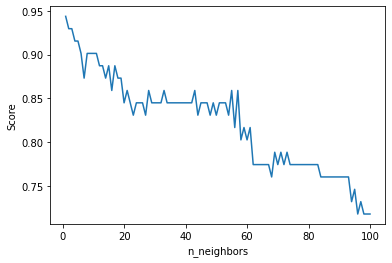

In [ ]:
# Visualize which nearest-neighbors leads to the highest Accuracy Score

plt.plot(n_max, r1)
plt.xlabel('n_neighbors')
plt.ylabel('Score');

###### Optimal Maximum Depth for Random Forest

In [ ]:
# Obtaining Maximum Depth of Random Forest

# List of values to try for max_depth:
# We will try every value between 2 and 36
d_max = list(range(1, 201, 1)) 
# List to store the score for each value of max_depth:
r2 = []
for d in d_max:
    rf_x = RandomForestClassifier(max_depth = d, random_state = 42)
    rf_x.fit(X_train_rf, y_train_rf)
    score_rf = rf_x.score(X_test_rf, y_test_rf)
    r2.append(score_rf)
    
print(r2)

[0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394,

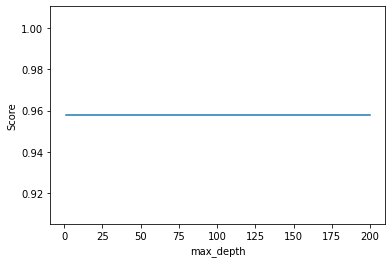

In [ ]:
# Visualize which Max_depth leads to the highest Accuracy

plt.plot(d_max, r2)
plt.xlabel('max_depth')
plt.ylabel('Score');

##### Additional Model for KNN

###### Pipelines and Metrics

In [ ]:
#Change Hyperparameter of n_neighbors to 10
knn_1 = KNeighborsClassifier(n_neighbors = 10)
knn_pipeline_1 = make_pipeline(scaler, knn_1)

# Fit to KNN Pipelines
knn_pipeline_1.fit(X_train_knn, y_train_knn)

# Obtain Predictions
test_preds_knn1 = knn_pipeline_1.predict(X_test_knn)

# Calculate Accuracy Score
accuracy_knn1 = accuracy_score(y_test_knn, test_preds_knn1)
accuracy_knn1 = round(accuracy_knn1, 4)

# Calculate Recall Score
recall_knn1 = metrics.recall_score(y_test_knn, test_preds_knn1)
recall_knn1 = round(recall_knn, 4)

# calculate Classification Accuracy - Default
score_knn1 = knn_pipeline_1.score(X_test_knn, y_test_knn);
score_knn1 = round(score_knn1, 4);

print('The KNN Accuracy Score is', accuracy_knn1)
print('The KNN Recall Score is', recall_knn)
print('The Default KNN Classification Accuracy is', score_knn1);

The KNN Accuracy Score is 0.9014
The KNN Recall Score is 0.8571
The Default KNN Classification Accuracy is 0.9014


###### Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


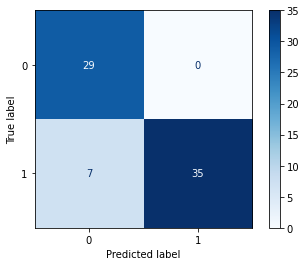

In [ ]:
# Confusion Matrix for KNN

plot_confusion_matrix(knn_pipeline_1, X_test_knn, y_test_knn, cmap = 'Blues');

In [ ]:
# KNN at N-Nearest Neighbors = 10 

cm_knn_1 = metrics.confusion_matrix(y_test_knn.values, test_preds_knn1)
tn_knn1, fp_knn1, fn_knn1, tp_knn1 = cm_knn_1.ravel()

print('Tn is ',tn_knn1, '= True Negative for KNN Model')
print('\n')
print('Fp is ',fp_knn1, '= False Positive for KNN Model')
print('\n')
print('Fn is ',fn_knn1, '= False Negative for KNN Model')
print('\n')
print('Tp is ',tp_knn1, '= True Positive for KNN Model')

Tn is  29 = True Negative for KNN Model


Fp is  0 = False Positive for KNN Model


Fn is  7 = False Negative for KNN Model


Tp is  35 = True Positive for KNN Model


###### Sensitivity vs Specificity

In [ ]:
# Sensitivity
sensitivity_knn_1 = tp_knn1 / (tp_knn1 + fn_knn1)
sensitivity_knn_1 = round(sensitivity_knn_1, 4);

#Specificity
specificity_knn_1 = tn_knn1 / (tn_knn1 + fp_knn1)
specificity_knn_1 = round(specificity_knn_1, 4);

print('Sensitivity is ',sensitivity_knn_1, 'for Tuned KNN Model')
print('\n')
print('Specificity is ',specificity_knn_1, 'for Tuned KNN Model')

Sensitivity is  0.8333 for Tuned KNN Model


Specificity is  1.0 for Tuned KNN Model


##### Additional Model for Random Forest

###### Pipelines and Metrics

In [ ]:
#Create a pipeline with a StandardScaler and KNN Classifier
rf_1 = RandomForestClassifier(max_depth = 10, random_state = 42)
rf_pipeline_1 = make_pipeline(scaler, rf_1)

# Fit to Random Forest Pipelines
rf_pipeline_1.fit(X_train_rf, y_train_rf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [ ]:
# Obtain Predictions
test_preds_rf1 = rf_pipeline_1.predict(X_test_rf)

# Calculate Accuracy Score
accuracy_rf1 = accuracy_score(y_test_rf, test_preds_rf1)
accuracy_rf1 = round(accuracy_rf1, 4)

# Calculate Recall Score
recall_rf1 = metrics.recall_score(y_test_rf, test_preds_rf1)
recall_rf1 = round(recall_rf, 4)

# calculate Classification Accuracy - Default
score_rf1 = rf_pipeline_1.score(X_test_rf, y_test_rf);
score_rf1 = round(score_rf1, 4);

print('The Random Forest Accuracy Score is', accuracy_rf1)
print('The Random Forest Recall Score is', recall_rf1)
print('The Default Random Forest Classification Accuracy is', score_rf1);

The Random Forest Accuracy Score is 0.9577
The Random Forest Recall Score is 0.9286
The Default Random Forest Classification Accuracy is 0.9577


###### Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


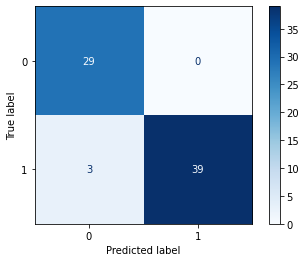

In [ ]:
# Confusion Matrix for Tuned Random Forest

plot_confusion_matrix(rf_pipeline_1, X_test_rf, y_test_rf, cmap = 'Blues');

In [ ]:
# KNN at Max_Depth = 10 

cm_rf_1 = metrics.confusion_matrix(y_test_rf.values, test_preds_rf1)
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = cm_rf_1.ravel()

print('Tn is ',tn_rf1, '= True Negative for Random Forest Model')
print('\n')
print('Fp is ',fp_rf1, '= False Positive for Random Forest Model')
print('\n')
print('Fn is ',fn_rf1, '= False Negative for Random Forest Model')
print('\n')
print('Tp is ',tp_rf1, '= True Positive for Random Forest Model')

Tn is  29 = True Negative for Random Forest Model


Fp is  0 = False Positive for Random Forest Model


Fn is  3 = False Negative for Random Forest Model


Tp is  39 = True Positive for Random Forest Model


###### Sensitivity vs Specificity

In [ ]:
# Sensitivity
sensitivity_rf_1 = tp_rf1 / (tp_rf1 + fn_rf1)
sensitivity_rf_1 = round(sensitivity_rf_1, 4);

#Specificity
specificity_rf_1 = tn_rf1 / (tn_rf1 + fp_rf1)
specificity_rf_1 = round(specificity_rf_1, 4);

print('Sensitivity is ',sensitivity_rf_1, 'for Tuned Random Forest Model')
print('\n')
print('Specificity is ',specificity_rf_1, 'for Tuned Random Forest Model')

Sensitivity is  0.9286 for Tuned Random Forest Model


Specificity is  1.0 for Tuned Random Forest Model


##### Final Model - Random Forest - Default Hyperparameters

The Final model that is appropriate for this data set will be Random Forest with default hyperparameters. 


---


Since this data set is related to the medical field, it is important to achieve high sensitivity. The sensitivity of the default Random Forest Model is higher compared to the default KNN Model. 


---


Therefore, the approriate model for this data set is the ***Random Forest Classifier using default hyperparameters. ***

In [ ]:
# Comparing Sensitivities of Default KNN and Default Random Foreset

print('Sensitivity is ',sensitivity_knn, 'for KNN Model')
print('Specificity is ',specificity_knn, 'for KNN Model')
print('\n')
print('Sensitivity is ',sensitivity_rf, 'for Random Forest Model')
print('Specificity is ',specificity_rf, 'for Random Forest Model')
print('\n')
print('Sensitivity is ',sensitivity_knn_1, 'for Tuned KNN Model')
print('Specificity is ',specificity_knn_1, 'for Tuned KNN Model')
print('\n')
print('Sensitivity is ',sensitivity_rf_1, 'for Tuned Random Forest Model')
print('Specificity is ',specificity_rf_1, 'for Tuned Random Forest Model')

Sensitivity is  0.8571 for KNN Model
Specificity is  1.0 for KNN Model


Sensitivity is  0.9286 for Random Forest Model
Specificity is  1.0 for Random Forest Model


Sensitivity is  0.8333 for Tuned KNN Model
Specificity is  1.0 for Tuned KNN Model


Sensitivity is  0.9286 for Tuned Random Forest Model
Specificity is  1.0 for Tuned Random Forest Model
